In [5]:
# Import dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

34.49719538834168 -108.59155830878082
3.306726238367901 -17.35090332570408
23.12452440428602 -131.87400763626243
62.09673685556049 47.477206582400015
41.514346030288465 -70.82171570008313
-38.96018969255676 162.8096887250632
55.622785981071075 -139.3000942246099
34.662989955697256 -14.732222766325208
-24.6297733167427 -167.99245544642662
-79.13850289613626 -132.0364626491308
-16.600050552510794 -52.844276422281126
-29.291976753266376 114.29322122037189
50.476889473494 -59.97200209665908
-79.0445900618864 -47.49666102527627
-78.39301964533513 -124.33598158353306
-81.81042970966803 133.03949101298122
-56.88287534974823 -90.98988161411623
-18.508750541676633 4.717887462062606
-41.104040071247276 -3.714871956423906
-45.32047179392966 -46.197121476653734
-35.10693954559611 155.94502421689788
-30.584944835450344 153.08953088815878
63.2769131921178 105.62547213444844
-20.528219253325403 -34.85468137950181
34.487527756915355 -46.06150644144674
8.562280465456112 117.77386221063006
83.9868099591

64.68016416245877 163.48118688397886
-50.08920595837466 -108.89232635349838
-55.012983264039015 -52.14058026347392
77.8201846252665 -85.05773174906565
26.35300690374811 56.123115313902275
-83.2525312014086 -144.73239133648514
-28.94015216569153 139.13954705682312
32.24226056869256 150.5047663593332
-75.85519566276518 76.20110272618672
-22.29302592609136 -140.08809907106587
-43.05376246168968 23.28327168341346
41.540765431253135 83.76125289256237
39.7783304807036 175.51395610694897
-74.41958860191338 -27.983432433879614
51.53270903172077 150.48920523358618
-2.5654740034656953 165.58313245664846
44.690537289748136 -75.03191171868932
-45.73828742907018 -105.65755266610769
-12.64513287167641 22.982516462778136
64.11144483507158 24.13847506936324
-30.55513170103847 -58.053124897931454
-53.82361243824417 -30.51791933336807
81.8202791658486 4.836038639232157
-89.95501767426425 -37.30687392607609
44.41126332373827 -134.87057983301543
-62.52592329730555 -66.11872298235556
-25.172764148268087 15

In [9]:
# Import citypy module

from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [11]:
# import requests library and api key

import requests
from config import weather_api_key

In [12]:
# Build URL query
#city = ""
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in the list

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grants
Processing Record 2 of Set 1 | bonthe
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | kharitonovo
Processing Record 5 of Set 1 | fairhaven
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | camacha
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | alto araguaia
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | nelson bay
Processing Record 21 of Set 1 | nambucca heads
Processing Record 22 of Set 1 | yerbogachen
Processing Record 23 of Set 1 |

Processing Record 35 of Set 4 | caledon east
Processing Record 36 of Set 4 | isangel
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | ishinomaki
Processing Record 39 of Set 4 | paragominas
Processing Record 40 of Set 4 | sabla
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | bambous virieux
Processing Record 43 of Set 4 | poltavka
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | shimoda
Processing Record 46 of Set 4 | zyryanka
Processing Record 47 of Set 4 | jizan
Processing Record 48 of Set 4 | olafsvik
Processing Record 49 of Set 4 | darab
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | grabs
Processing Record 2 of Set 5 | roma
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | santiago de cuba
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | mogadishu
Processing Record

Processing Record 28 of Set 8 | lexington
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | talara
Processing Record 31 of Set 8 | bandipur
Processing Record 32 of Set 8 | fortuna foothills
Processing Record 33 of Set 8 | cedar city
Processing Record 34 of Set 8 | souillac
Processing Record 35 of Set 8 | paka
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | eyl
Processing Record 39 of Set 8 | jundubah
City not found. Skipping...
Processing Record 40 of Set 8 | contamana
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | dicabisagan
Processing Record 43 of Set 8 | alihe
Processing Record 44 of Set 8 | bud
Processing Record 45 of Set 8 | carutapera
Processing Record 46 of Set 8 | towada
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 8 | n

Processing Record 15 of Set 12 | saint anthony
Processing Record 16 of Set 12 | muswellbrook
Processing Record 17 of Set 12 | huayucachi
Processing Record 18 of Set 12 | edd
Processing Record 19 of Set 12 | hailey
Processing Record 20 of Set 12 | kirakira
Processing Record 21 of Set 12 | namatanai
Processing Record 22 of Set 12 | davila
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | hunterville
Processing Record 25 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 26 of Set 12 | luanda
Processing Record 27 of Set 12 | mangai
Processing Record 28 of Set 12 | kurilsk
Processing Record 29 of Set 12 | weyburn
Processing Record 30 of Set 12 | gamba
Processing Record 31 of Set 12 | at-bashi
Processing Record 32 of Set 12 | noci
Processing Record 33 of Set 12 | ouidah
Processing Record 34 of Set 12 | lolua
City not found. Skipping...
Processing Record 35 of Set 12 | thurso
Processing Record 36 of Set 12 | vanimo
Processing Record 37 of Set 12 

In [15]:
# Find number of cities returned 

city_data_length = len(city_data)
city_data_length

567

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grants,35.1473,-107.8514,28.63,46,0,0.00,US,2022-11-17 00:42:28
1,Bonthe,7.5264,-12.5050,76.75,82,44,0.92,SL,2022-11-17 00:42:47
2,Lompoc,34.6391,-120.4579,69.69,34,0,8.05,US,2022-11-17 00:42:47
3,Kharitonovo,61.4009,47.4978,13.55,89,19,4.23,RU,2022-11-17 00:42:48
4,Fairhaven,41.6376,-70.9036,45.00,76,40,12.66,US,2022-11-17 00:42:48
5,Te Anau,-45.4167,167.7167,60.82,79,100,2.84,NZ,2022-11-17 00:42:49
6,Sitka,57.0531,-135.3300,49.89,76,0,0.00,US,2022-11-17 00:42:49
7,Camacha,33.0833,-16.3333,65.62,94,40,6.91,PT,2022-11-17 00:42:50
8,Alofi,-19.0595,-169.9187,82.29,74,75,10.36,NU,2022-11-17 00:42:50
9,Rikitea,-23.1203,-134.9692,73.27,89,100,24.02,PF,2022-11-17 00:42:51


In [17]:
new_column_order=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grants,US,2022-11-17 00:42:28,35.1473,-107.8514,28.63,46,0,0.00
1,Bonthe,SL,2022-11-17 00:42:47,7.5264,-12.5050,76.75,82,44,0.92
2,Lompoc,US,2022-11-17 00:42:47,34.6391,-120.4579,69.69,34,0,8.05
3,Kharitonovo,RU,2022-11-17 00:42:48,61.4009,47.4978,13.55,89,19,4.23
4,Fairhaven,US,2022-11-17 00:42:48,41.6376,-70.9036,45.00,76,40,12.66
5,Te Anau,NZ,2022-11-17 00:42:49,-45.4167,167.7167,60.82,79,100,2.84
6,Sitka,US,2022-11-17 00:42:49,57.0531,-135.3300,49.89,76,0,0.00
7,Camacha,PT,2022-11-17 00:42:50,33.0833,-16.3333,65.62,94,40,6.91
8,Alofi,NU,2022-11-17 00:42:50,-19.0595,-169.9187,82.29,74,75,10.36
9,Rikitea,PF,2022-11-17 00:42:51,-23.1203,-134.9692,73.27,89,100,24.02


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

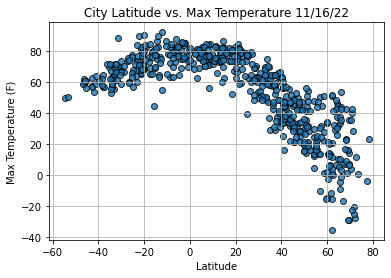

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

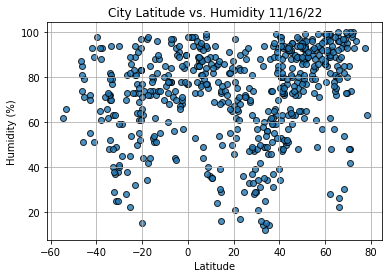

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

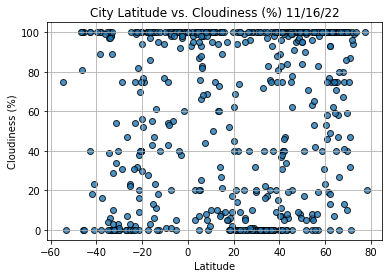

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

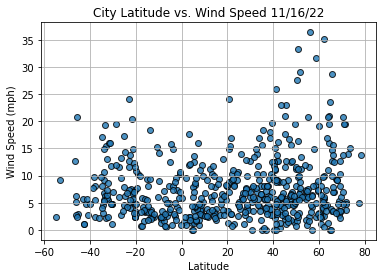

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-11-17 00:41:34
Lat                         -54.8
Lng                         -68.3
Max Temp                    49.66
Humidity                       62
Cloudiness                     75
Wind Speed                    2.3
Name: 13, dtype: object

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grants,US,2022-11-17 00:42:28,35.1473,-107.8514,28.63,46,0,0.00
1,Bonthe,SL,2022-11-17 00:42:47,7.5264,-12.5050,76.75,82,44,0.92
2,Lompoc,US,2022-11-17 00:42:47,34.6391,-120.4579,69.69,34,0,8.05
3,Kharitonovo,RU,2022-11-17 00:42:48,61.4009,47.4978,13.55,89,19,4.23
4,Fairhaven,US,2022-11-17 00:42:48,41.6376,-70.9036,45.00,76,40,12.66


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

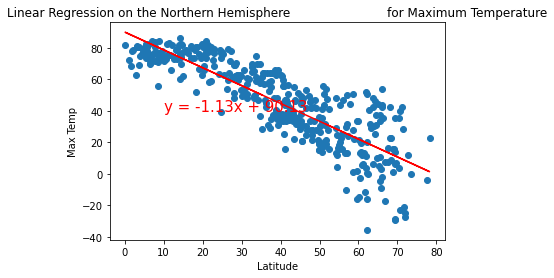

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

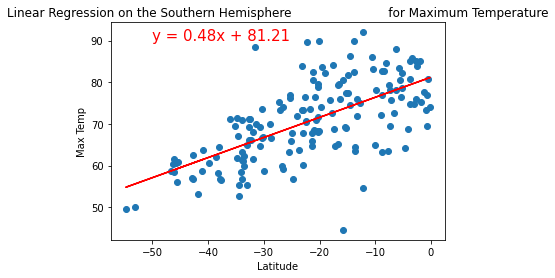

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

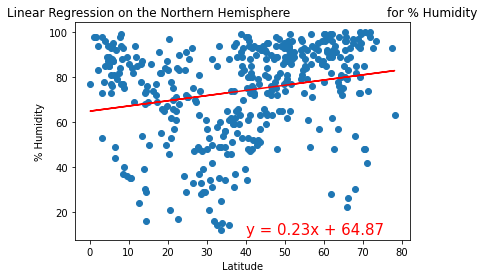

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

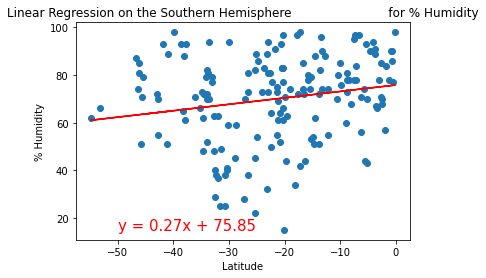

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

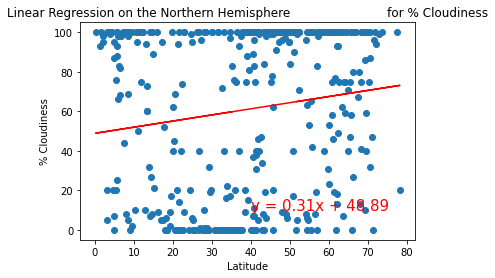

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

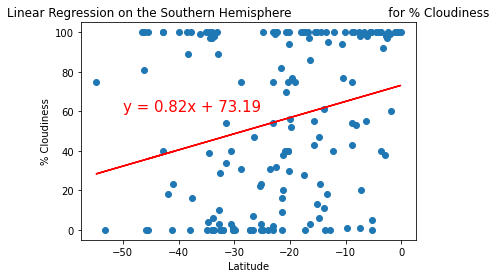

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

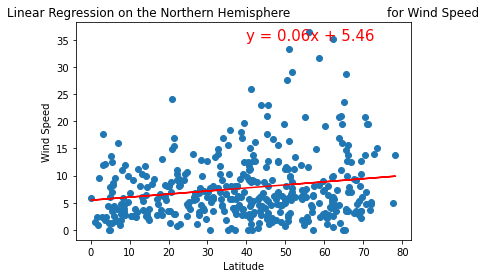

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

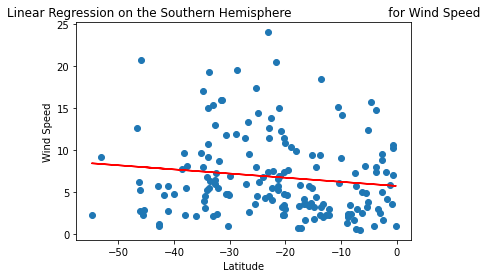

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))